# Descomplicando Redes Neurais

[Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU)

### Dados

Suponha que você deseje prever a nota que você irá tirar na prova dado o número de horas que você estudou e dormiu.
Então é um vetor x = (qt horas de estudo para a prova, qt horas dormidas no dia anterior a prova) e y = nota obtida na prova. A seguir temos alguns dados que iremos usar para treinar nosso modelo.

In [1]:
import numpy as np

In [2]:
x = np.array(([3, 5], [5, 1], [10, 2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [3]:
x

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [4]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

Há um problema de unidade em nossos dados, nosso vetor x tem dados em horas e nossa valor y é uma nota. Para isso vamos usar um método de escalonamento:

x = x/max(x) e y = y/max(y)

In [5]:
X = x/np.max(x, axis=0)
y = y/100 # nota máxima na prova é 100

### Arquitetura Forward Propagation

In [6]:
def sigmoid(z):
    # aplica a função de ativação
    # do tipo sigmode, uma função logística
    return 1/(1 + np.exp(-z))

In [7]:
from matplotlib.pyplot import plot, grid, show

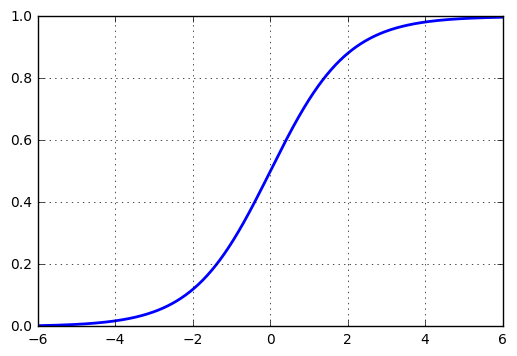

In [8]:
testInput = np.arange(-6, 6, 0.01)
plot(testInput, sigmoid(testInput), linewidth=2)
grid(1);
show()

O legal é que a nossa função que usa np.exp() aceita tanto um valor unitário como um vetor ou matriz.

In [9]:
sigmoid(1)

0.7310585786300049

In [10]:
sigmoid(np.array([-1, 0, 1]))

array([ 0.26894142,  0.5       ,  0.73105858])

In [11]:
sigmoid(np.random.randn(3, 3))

array([[ 0.61849065,  0.39926823,  0.17024203],
       [ 0.64573026,  0.30695604,  0.38260627],
       [ 0.46448094,  0.86604708,  0.50326672]])

In [12]:
class Neural_Network(object):
    def __init__(self, inputLayerSize=2, outputLayerSize=1, hiddenLayerSize=3):
        # define hiperparametros
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        
        # pesos (parâmetros)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def sigmoid(self, z):
        # aplica a função de ativação
        # do tipo sigmode, uma função logística
        return 1/(1 + np.exp(-z))
        
    def forward(self, X):
        # Propagada os dados de entrada 
        # pelas camadas escondidas
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        
        return yHat

In [13]:
NN = Neural_Network()

In [14]:
yHat = NN.forward(X)

In [15]:
yHat

array([[ 0.7448673 ],
       [ 0.73291273],
       [ 0.6801232 ]])

In [16]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

Os resultados não foram tão bons porque ainda não treinamos nosso modelo.